# load packages and modules

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import MangroveConservation.get_twitter_data1 as getTwitterdata
import MangroveConservation.clean_text1 as clean
import MangroveConservation.sentiment_analysis1 as sentiment
import MangroveConservation.visualization as visual
%matplotlib inline
help(getTwitterdata.get_data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gongmimi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/gongmimi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Help on function get_data in module MangroveConservation.get_twitter_data1:

get_data(search_query, api_key, secret_key, to_date, from_date, filename)
    get twitter data through twitter API from full archive search sand box and return all twitters in JSONL file
    based on 
     search term, 
     the geographic location of interest
     the time period of interest.
     and personal twitter account information.
    
     Reference: https://github.com/geduldig/TwitterAPI/tree/master/TwitterAPI
     Reference: https://developer.twitter.com/en/docs/tweets/search/overview



# collect twitter data


In [52]:
###collect twitter data and save them into CSV
api_key = 'i2uWM8Fvt36ipy3pEXk5Cy7ue'
secret_key = 'FKZBP7QjykINzuAJPVaEsO5l106xd939lmNmXoWQhl0Arqhpzz'
#DEV_ENVIRONMENT_LABEL = 'mangroveConservation'
#API_SCOPE = 'fullarchive'  # 'fullarchive' for full archive, '30day' for last 31 days

search_query = '-RT mangrove forest'
to_date = '2019-06-19' # format YYYY-MM-DD HH:MM (hour and minutes optional)
from_date = '2019-12-31'  # format YYYY-MM-DD HH:MM (hour and minutes optional)
filename = 'twitter_premium_api_demo1.jsonl'  # Where the Tweets should be saved
csvfile = 'mangrove1.csv'

#getTwitterdata.get_data(search_query,api_key,secret_key,to_date,frome_date,filename)


In [3]:
FILENAME = '/home/gongmimi/CMSE802/MangroveConservation/twitter_premium_api_demo1.jsonl'
csvfile = '/home/gongmimi/CMSE802/MangroveConservation/mangrove1.csv'

tweets = getTwitterdata.load_jsonl(FILENAME)

#getTwitterdata.create_csv(tweets,csvfile)


In [5]:
tweets = clean.import_tweet("/home/gongmimi/CMSE802/MangroveConservation/mangrove1.csv")
#tweets = clean.ImportTweet("/Users/DELL/Dropbox/MangroveConservation/mangrove1.csv")

# exploratory analysis

## collect the most fewquent words/phrases and graph wordcloud map

In [6]:
tweets

time                   id        lat       long  \
0    2019-12-30 21:11:32+00:00  1211756730616561670        NaN        NaN   
1    2019-12-30 20:11:45+00:00  1211741686612709376        NaN        NaN   
2    2019-12-30 18:01:01+00:00  1211708784902623232  72.570232  23.013959   
3    2019-12-30 17:40:59+00:00  1211703743907008513        NaN        NaN   
4    2019-12-30 17:24:12+00:00  1211699521865965568        NaN        NaN   
...                        ...                  ...        ...        ...   
2995 2019-06-19 10:07:15+00:00  1141286310474407936        NaN        NaN   
2996 2019-06-19 09:39:26+00:00  1141279311795802112        NaN        NaN   
2997 2019-06-19 09:39:05+00:00  1141279225279725569        NaN        NaN   
2998 2019-06-19 08:32:08+00:00  1141262373451436032        NaN        NaN   
2999 2019-06-19 06:21:17+00:00  1141229447309352960  98.829387   8.038468   

                      name                                   user_description  \
0           Nach not Notch                                        i like food   
1                    NAIDU                             Be Don t Try To Become   
2             Shwetal Shah  Technical Adviser Dept of Climate Change Gujar...   
3          vinay shreshtha                                                nan   
4          vinay shreshtha                                                nan   
...                    ...                                                ...   
2995       colin warburton  human animal rights people other dimensions me...   
2996            Deji Sadiq  I m a LASU trained Economist turned Blogger an...   
2997      Ultrascan HUMINT  Liaison Reliable Primary HUMINT Sources Money ...   
2998            MethaneNet  Biogeochemistry sources fluxes microbiology an...   
2999  Vacharapan Mongkalee                                                nan   

                                                  tweet  user_joined  \
0     I might regret this in more than one way For t...         2011   
1     India State of Forest Report ISFR Mangrove cov...         2012   
2     Government of India released Forest report Guj...         2011   
3        JOURNEY ABOUT TO START FOR THE MANGROVE FOREST         2010   
4     ABOUT TO ENTER BICHITRAPUR MANGROVE FOREST ODISHA         2010   
...                                                 ...          ...   
2995  Dozens of tigers live in the Sundarbans mangro...         2013   
2996  The tiger widows of India Dozens of tigers liv...         2011   
2997  The tiger widows of India Dozens of tigers liv...         2013   
2998  Are methane emissions from mangrove stems a cr...         2010   
2999  TIKbyStarlight lifting service YesWeDo Starlig...         2014   

                     user_location  follower_count country_code  \
0                  Los Angeles, CA             382          NaN   
1     Hyderabad Telangana India 🇮🇳           19259          NaN   
2                            India             363      ('IN',)   
3               पश्चिम बंगाल, भारत               0          NaN   
4               पश्चिम बंगाल, भारत               0          NaN   
...                            ...             ...          ...   
2995           Warrington, England            1407          NaN   
2996                Lagos, Nigeria            1411          NaN   
2997                           NaN            3341          NaN   
2998      University of Birmingham            1521          NaN   
2999                           NaN              95      ('TH',)   

                      place                                        coordinates  
0                       NaN                                                NaN  
1                       NaN                                                NaN  
2     Ahmadabad City, India  [[[72.436739, 22.923256], [72.436739, 23.10466...  
3                       NaN                                                NaN  
4                       NaN                          

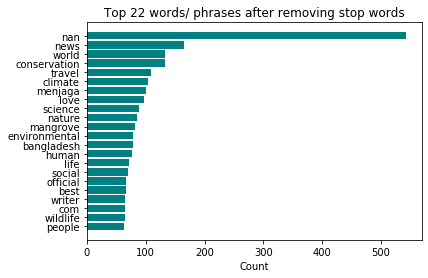

In [104]:
sentiment.PlotTopWords(tweets["user_description"],22,1,5)

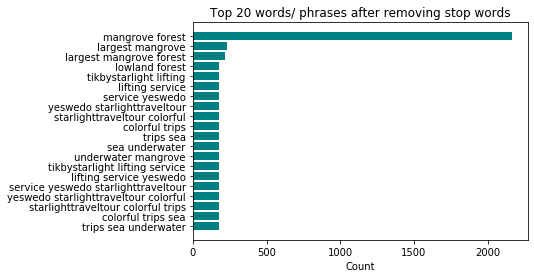

In [105]:
sentiment.PlotTopWords(tweets["tweet"],20,2,4)

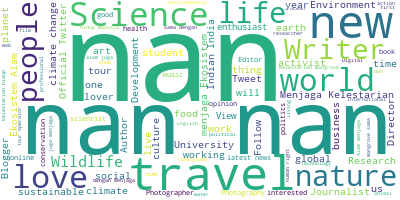

In [106]:
sentiment.PlotWordCloud(tweets['user_description'])

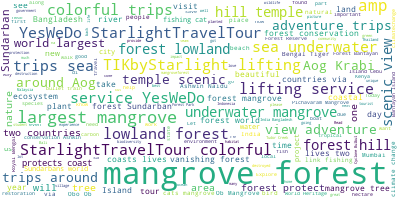

In [63]:
sentiment.PlotWordCloud(tweets['tweet'])

# sentiment analysis

In [109]:
tweets["sentiment"]=sentiment.Sentiment(tweets["tweet"])
tweets.head()
tweets.to_csv("mangrove1_cleaned.csv", index=False, header=True)

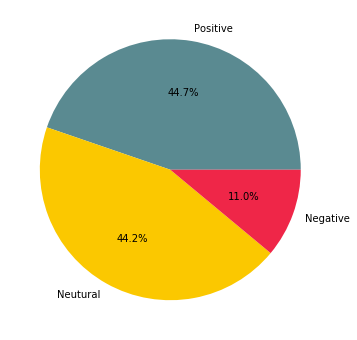

In [108]:
sentiment.PlotSentiment(tweets["sentiment"])

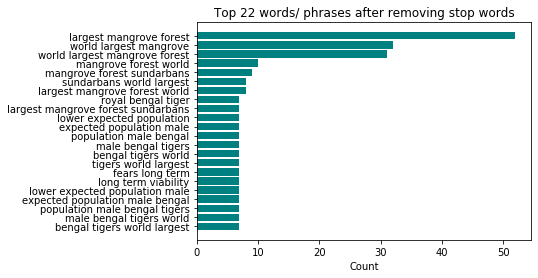

In [86]:
negative = tweets[tweets['sentiment']=='Negative']['tweet']
sentiment.PlotTopWords(negative,22,3,5)

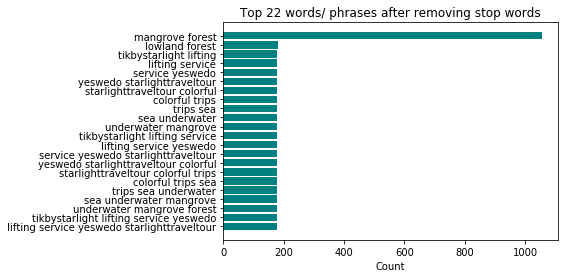

In [96]:
positive = tweets[tweets['sentiment']=='Positive']['tweet']
sentiment.PlotTopWords(positive,22,2,4)

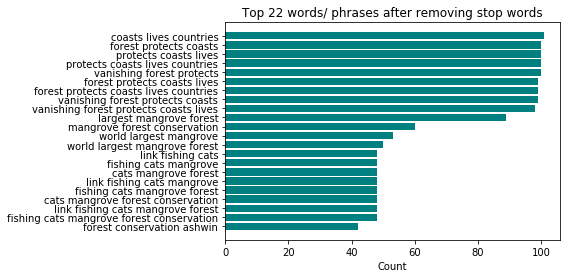

In [94]:
neutral = tweets[tweets['sentiment']=='Neutral']['tweet']
sentiment.PlotTopWords(neutral,22,3,5)

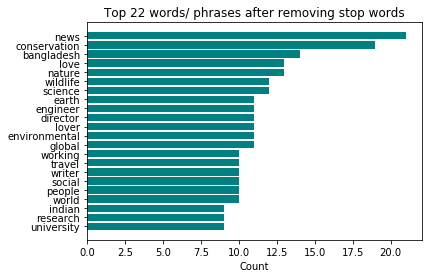

In [100]:
neg_user = tweets[tweets['sentiment']=='Negative']['user_description']
sentiment.PlotTopWords(neg_user,22,1,5)

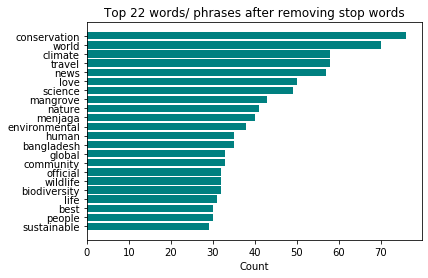

In [101]:
pos_user = tweets[tweets['sentiment']=='Positive']['user_description']
sentiment.PlotTopWords(pos_user,22,1,5)

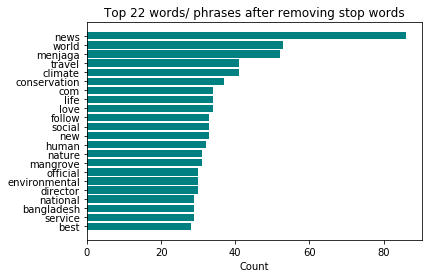

In [102]:
neu_user = tweets[tweets['sentiment']=='Neutral']['user_description']
sentiment.PlotTopWords(neu_user,22,1,5)

# Data visualization

# Visualization

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


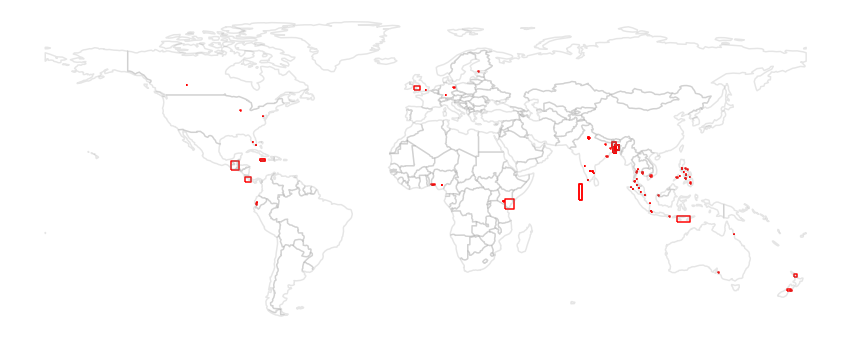

In [17]:
# name of the file with the Tweet objects

overlay,world = clip_polygon(tweets)
overlay,points = centroid_polygon(overlay)
visualization_polygons(overlay,world)

